**Human riboseq: position-matched motif and nonmotif analysis**

In [44]:
import csv
import pandas as pd
import matplotlib.pyplot as pltimport seaborn as sns

In [45]:
nonmotif_bed = pd.read_csv(
    "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_non_motif_regions.bed",
    sep="\t",
    header=None,
    names=["chrom", "start", "end", "name", "score", "strand"]
)


In [46]:
delta_df = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/nonmotif_delta_from_cds_start.csv")
nonmotif_bed["delta_from_cds_start"] = delta_df["delta_from_cds_start"]


In [47]:
motif_delta = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/motif_delta_from_cds_start.csv")
motif_bed = pd.read_csv(
    "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_regions.bed",
    sep="\t",
    header=None,
    names=["chrom", "start", "end", "name", "score", "strand"]
)
motif_bed["delta_from_cds_start"] = motif_delta["delta_from_cds_start"]


In [50]:
# Drop NaN values before rounding and casting
# Change motif_df to motif_bed and nonmotif_df to nonmotif_bed
motif_bed = motif_bed.dropna(subset=["delta_from_cds_start"])
nonmotif_bed = nonmotif_bed.dropna(subset=["delta_from_cds_start"])
motif_bed["delta_rounded"] = motif_bed["delta_from_cds_start"].round().astype(int)
nonmotif_bed["delta_rounded"] = nonmotif_bed["delta_from_cds_start"].round().astype(int)

In [51]:
print(motif_bed["delta_from_cds_start"].isna().sum(), "NaNs in motif")
print(nonmotif_bed["delta_from_cds_start"].isna().sum(), "NaNs in nonmotif")


0 NaNs in motif
0 NaNs in nonmotif


In [52]:
# Show a few rows where the delta is NaN
print("Motif NaNs:")
print(motif_bed[motif_bed["delta_from_cds_start"].isna()].head())

print("\nNonmotif NaNs:")
print(nonmotif_bed[nonmotif_bed["delta_from_cds_start"].isna()].head())


Motif NaNs:
Empty DataFrame
Columns: [chrom, start, end, name, score, strand, delta_from_cds_start, delta_rounded]
Index: []

Nonmotif NaNs:
Empty DataFrame
Columns: [chrom, start, end, name, score, strand, delta_from_cds_start, delta_rounded]
Index: []


In [53]:
# Remove rows with NaNs in the delta column
motif_bed = motif_bed.dropna(subset=["delta_from_cds_start"]).copy()
nonmotif_bed = nonmotif_bed.dropna(subset=["delta_from_cds_start"]).copy()

# Now it's safe to round
motif_bed["delta_rounded"] = motif_bed["delta_from_cds_start"].round().astype(int)
nonmotif_bed["delta_rounded"] = nonmotif_bed["delta_from_cds_start"].round().astype(int)


In [54]:
import numpy as np
motif_bed = motif_bed[np.isfinite(motif_bed["delta_from_cds_start"])]
nonmotif_bed = nonmotif_bed[np.isfinite(nonmotif_bed["delta_from_cds_start"])]

In [56]:
import pandas as pd

# Load BED and delta files
motif_delta_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/motif_delta_from_cds_start.csv"
motif_bed_path   = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_regions.bed"
nonmotif_delta_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/nonmotif_delta_from_cds_start.csv"
nonmotif_bed_path   = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_non_motif_regions.bed"

# Print header for motif delta file
print("Motif delta file header:")
motif_delta = pd.read_csv(motif_delta_path)
print(motif_delta.head())
print("\n")

# Print header for motif bed file
print("Motif bed file header:")
motif_bed = pd.read_csv(motif_bed_path, sep="\t", header=None)
print(motif_bed.head())
print("\n")

# Print header for nonmotif delta file
print("Nonmotif delta file header:")
nonmotif_delta = pd.read_csv(nonmotif_delta_path)
print(nonmotif_delta.head())
print("\n")

# Print header for nonmotif bed file
print("Nonmotif bed file header:")
nonmotif_bed = pd.read_csv(nonmotif_bed_path, sep="\t", header=None)
print(nonmotif_bed.head())


Motif delta file header:
   deletion_index_start  CDS start  delta_from_cds_start
0                   180        160                    20
1                   195        160                    35
2                   210        160                    50
3                   105         87                    18
4                   120         87                    33


Motif bed file header:
    0          1          2      3  4  5
0  12    8946353    8946383  motif  0  -
1  12    8946338    8946368  motif  0  -
2  12    8946323    8946353  motif  0  -
3   6  143511585  143511615  motif  0  -
4   6  143511570  143511600  motif  0  -


Nonmotif delta file header:
   deletion_index_start  CDS start  delta_from_cds_start
0                   240        160                    80
1                   270        160                   110
2                   345        160                   185
3                   360        160                   200
4                    90         87             

In [68]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Load BED and delta files
motif_delta_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/motif_delta_from_cds_start.csv"
motif_bed_path   = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_regions.bed"
nonmotif_delta_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/nonmotif_delta_from_cds_start.csv"
nonmotif_bed_path   = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_non_motif_regions.bed"

# Load motif and nonmotif data
motif_df = pd.read_csv(motif_bed_path, sep="\t", header=None, names=["chrom", "start", "end", "name", "score", "strand"])
motif_delta = pd.read_csv(motif_delta_path)
motif_df["delta_from_cds_start"] = motif_delta["delta_from_cds_start"]

nonmotif_df = pd.read_csv(nonmotif_bed_path, sep="\t", header=None, names=["chrom", "start", "end", "name", "score", "strand"])
nonmotif_delta = pd.read_csv(nonmotif_delta_path)
nonmotif_df["delta_from_cds_start"] = nonmotif_delta["delta_from_cds_start"]

# Drop rows with NaNs
motif_df = motif_df.dropna(subset=["delta_from_cds_start"]).copy()
nonmotif_df = nonmotif_df.dropna(subset=["delta_from_cds_start"]).copy()

# Round delta to nearest integer
motif_df["delta_rounded"] = motif_df["delta_from_cds_start"].round().astype(int)
nonmotif_df["delta_rounded"] = nonmotif_df["delta_from_cds_start"].round().astype(int)

# Add a unique identifier to each nonmotif entry to track duplicates later
nonmotif_df["unique_id"] = range(len(nonmotif_df))

# Define the number of matching non-motif samples per motif sample
k = 4  # Change this value to your desired k

# Create ±5 offset values for efficient matching
tolerance = 5
ranges = [i for i in range(-tolerance, tolerance+1)]

# Create an expanded nonmotif dataframe with shifted delta values
nonmotif_expanded = pd.concat([
    nonmotif_df.assign(delta_rounded_shifted=nonmotif_df["delta_rounded"] + offset)
    for offset in ranges
])

# Group the motif dataframe by rounded delta
motif_groups = motif_df.groupby("delta_rounded")

# Prepare a list to collect all matched non-motif entries
all_matches = []

# Dictionary to keep track of which non-motif entries have been used
used_nonmotif_ids = set()

# Track excluded motifs
excluded_motifs = []
included_motifs = []

# For each motif delta value
for delta, motif_group in motif_groups:
    # Find all potential matching non-motif entries
    matching_nonmotif = nonmotif_expanded[nonmotif_expanded["delta_rounded_shifted"] == delta].copy()
    
    # Skip if no matches found
    if len(matching_nonmotif) == 0:
        excluded_motifs.extend(motif_group.index.tolist())
        continue
    
    # For each motif entry with this delta
    for _, motif_row in motif_group.iterrows():
        # Sort matching non-motif entries by how close their delta is to the motif's delta
        matching_nonmotif["delta_diff"] = abs(matching_nonmotif["delta_from_cds_start"] - motif_row["delta_from_cds_start"])
        sorted_matches = matching_nonmotif.sort_values("delta_diff")
        
        # Filter out already used non-motif entries
        sorted_matches = sorted_matches[~sorted_matches["unique_id"].isin(used_nonmotif_ids)]
        
        # Check if we have enough matches
        if len(sorted_matches) < k:
            excluded_motifs.append(motif_row.name)
            continue
        
        # Take exactly k matches
        k_matches = sorted_matches.head(k).copy()
        
        # Track this motif as included
        included_motifs.append(motif_row.name)
        
        # Mark these as used
        used_nonmotif_ids.update(k_matches["unique_id"].tolist())
        
        # Add the motif ID as a reference
        k_matches["matching_motif_id"] = motif_row.name
        
        # Add to our collection
        all_matches.append(k_matches)

# Combine all matches
if all_matches:
    final_matches = pd.concat(all_matches)
    
    # Remove duplicate genomic regions if needed
    final_matches_unique = final_matches.drop_duplicates(subset=["chrom", "start", "end", "strand"])
    
    # Save to BED6
    output_nonmotif_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched.bed"
    final_matches_unique[["chrom", "start", "end", "name", "score", "strand"]].to_csv(output_path, sep="\t", header=False, index=False)

    output_motif_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_position_matched.bed"
    motif_df[["chrom", "start", "end", "name", "score", "strand"]].to_csv(output_motif_path, sep="\t", header=False, index=False)
    
    # Save a version with match information for debugging/analysis
    output_info_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_1_to_k_matched_info.csv"
    final_matches.to_csv(output_info_path, index=False)
    
    # Save excluded motifs information
    excluded_motifs_df = motif_df.loc[excluded_motifs]
    excluded_motifs_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/excluded_motifs_insufficient_matches.bed"
    excluded_motifs_df[["chrom", "start", "end", "name", "score", "strand"]].to_csv(excluded_motifs_path, sep="\t", header=False, index=False)
    
    # Report statistics
    print(f"Successfully created 1-to-{k} matches.")
    print(f"Total motif samples: {len(motif_df)}")
    print(f"Motif samples with {k} matches: {len(included_motifs)}")
    print(f"Motif samples excluded (insufficient matches): {len(excluded_motifs)}")
    print(f"Total matched non-motif samples: {len(final_matches_unique)}")
else:
    print("No matches found.")

Successfully created 1-to-4 matches.
Total motif samples: 3481
Motif samples with 4 matches: 3481
Motif samples excluded (insufficient matches): 0
Total matched non-motif samples: 13780


In [70]:
import pandas as pd

# File paths
motif_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_position_matched.bed"
matched_nonmotif_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched.bed"

# Load BED files
motif_df = pd.read_csv(motif_file, sep="\t", header=None, names=["chrom", "start", "end", "name", "score", "strand"])
matched_nonmotif_df = pd.read_csv(matched_nonmotif_file, sep="\t", header=None, names=["chrom", "start", "end", "name", "score", "strand"])

# Print counts
print(f"🧬 Motif regions: {len(motif_df)}")
print(f"🧬 Position-matched nonmotif regions: {len(matched_nonmotif_df)}")

# Optional: Check overlap in coordinates
motif_coords = set(motif_df[["chrom", "start", "end", "strand"]].apply(tuple, axis=1))
nonmotif_coords = set(matched_nonmotif_df[["chrom", "start", "end", "strand"]].apply(tuple, axis=1))
common = motif_coords & nonmotif_coords

print(f"🔁 Exact coordinate matches between files: {len(common)}")


🧬 Motif regions: 3481
🧬 Position-matched nonmotif regions: 13780
🔁 Exact coordinate matches between files: 19


In [71]:
# Load both BED files
motif_df = pd.read_csv("synapse_motif_regions.bed", sep="\t", header=None, names=["chrom", "start", "end", "name", "score", "strand"])
nonmotif_df = pd.read_csv("synapse_nonmotif_position_matched.bed", sep="\t", header=None, names=["chrom", "start", "end", "name", "score", "strand"])

# Merge to find exact matches
merged = pd.merge(nonmotif_df, motif_df, on=["chrom", "start", "end", "strand"], how="left", indicator=True)

# Keep only nonmotif rows that are NOT in motif
nonmotif_filtered = merged[merged["_merge"] == "left_only"].drop(columns=["_merge"])

# Save filtered nonmotif file
output_filtered = "synapse_nonmotif_position_matched_no_exact.bed"
nonmotif_filtered.to_csv(output_filtered, sep="\t", header=False, index=False)

print(f"✅ Filtered nonmotif regions saved to: {output_filtered}")
print(f"📉 Removed {len(nonmotif_df) - len(nonmotif_filtered)} exact coordinate matches")


✅ Filtered nonmotif regions saved to: synapse_nonmotif_position_matched_no_exact.bed
📉 Removed 21 exact coordinate matches


In [72]:
# Reload the broken file (assuming it was a DataFrame before)
bed_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched_no_exact.bed"

# Try reading with whitespace delimiter to rescue the data
df = pd.read_csv(bed_path, delim_whitespace=True, header=None)

# If it rescued the columns, check shape
print(f"Recovered shape: {df.shape}")
print(df.head())

# Ensure only 6 columns, and assign correct names
df = df.iloc[:, :6]
df.columns = ["chrom", "start", "end", "name", "score", "strand"]

# Save back correctly with tabs
df.to_csv(bed_path, sep="\t", index=False, header=False)
print(f"✅ Fixed and saved clean BED file to: {bed_path}")


Recovered shape: (13759, 6)
    0         1         2         3  4  5
0  19  55178970  55179000  nonmotif  0  -
1  17  59735367  59735397  nonmotif  0  +
2  19  55175224  55175254  nonmotif  0  -
3  19  50632784  50632811  nonmotif  0  -
4  19  40366856  40366886  nonmotif  0  +
✅ Fixed and saved clean BED file to: /tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched_no_exact.bed


In [73]:
import pandas as pd

bed_path = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched_no_exact.bed"

bed_df = pd.read_csv(bed_path, sep="\t", header=None, names=["chrom", "start", "end", "name", "score", "strand"])

print("🧾 BED file preview:")
print(bed_df.head())


🧾 BED file preview:
  chrom     start       end      name  score strand
0    19  55178970  55179000  nonmotif      0      -
1    17  59735367  59735397  nonmotif      0      +
2    19  55175224  55175254  nonmotif      0      -
3    19  50632784  50632811  nonmotif      0      -
4    19  40366856  40366886  nonmotif      0      +


In [74]:
import os
import subprocess
import pandas as pd
import json

# 🔹 Define paths
home_dir = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/synapse_riboseq"
output_dir = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/coverage_results"
output_csv = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_results_position_matched.csv"
bed_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched_no_exact.bed"
total_reads_file = os.path.join(output_dir, "total_reads.json")

# 🔹 Load total mapped reads
if not os.path.exists(total_reads_file):
    print(f"❌ Missing {total_reads_file}. Run get_total_reads.py first.")
    exit(1)

with open(total_reads_file, "r") as f:
    total_reads_dict = json.load(f)

# 🔹 List of BAM files
bam_files = list(total_reads_dict.keys())

# 🔹 Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# 🔹 Load BED6 file (chrom, start, end, name, score, strand)
bed_df = pd.read_csv(bed_file, sep="\t", header=None)

if bed_df.shape[1] >= 6:
    bed_df = bed_df.iloc[:, [0, 1, 2, 5]]  # Strand is column 6
else:
    bed_df = bed_df.iloc[:, [0, 1, 2]]
    bed_df[3] = "+"  # Default strand if missing

bed_df.columns = ["chrom", "start", "end", "strand"]
print(f"✅ BED file loaded: {bed_df.shape[0]} regions")
print(bed_df.head())

# 🔹 Store per-sample coverage results
coverage_dfs = {}

for bam in bam_files:
    bam_filename = os.path.basename(bam)
    output_file = os.path.join(output_dir, f"{bam_filename}.coverage.txt")

    print(f"\n🔄 Processing {bam_filename}...")

    # 🔹 Run strand-specific coverage
    cmd = f"bedtools coverage -s -a {bed_file} -b {bam} > {output_file}"
    subprocess.run(cmd, shell=True, check=True)

    # 🔹 Read and process coverage results
    coverage_df = pd.read_csv(output_file, sep="\t", header=None)
    if coverage_df.shape[1] < 7:
        print(f"❌ Unexpected format in {output_file}. Skipping...")
        continue

    # Extract columns: chrom, start, end, strand (col 6), coverage (col 7)
    coverage_df = coverage_df.iloc[:, [0, 1, 2, 5, 6]]
    coverage_df.columns = ["chrom", "start", "end", "strand", "coverage"]

    # Convert to numeric
    coverage_df["coverage"] = pd.to_numeric(coverage_df["coverage"], errors="coerce")

    # 🔹 Normalize using total mapped reads (RPM)
    total_reads = total_reads_dict.get(bam, 0)
    if total_reads == 0:
        print(f"❌ Skipping {bam_filename} due to zero mapped reads.")
        continue

    coverage_df["normalized_coverage"] = (coverage_df["coverage"] / total_reads) * 1e6

    # 🔹 Save intermediate file
    norm_out = os.path.join(output_dir, f"{bam_filename}_normalized.csv")
    coverage_df.to_csv(norm_out, index=False)
    print(f"✅ Saved normalized coverage: {norm_out}")

    # 🔹 Print header of normalized DataFrame
    print(f"\n🧾 Header of normalized DataFrame for {bam_filename}:")
    print(coverage_df.head())

    # Store for merging
    coverage_dfs[bam_filename] = coverage_df

# 🔹 Merge all results into one DataFrame
final_df = bed_df.copy()

for bam_filename, coverage_df in coverage_dfs.items():
    # Build mapping from (chrom, start, end, strand) → coverage
    cov_map = {
        (str(row["chrom"]), int(row["start"]), int(row["end"]), str(row["strand"])): row["normalized_coverage"]
        for _, row in coverage_df.iterrows()
    }

    # Add column
    final_df[bam_filename] = [
        cov_map.get((str(row["chrom"]), int(row["start"]), int(row["end"]), str(row["strand"])), float('nan'))
        for _, row in final_df.iterrows()
    ]
    print(f"✅ Added coverage from {bam_filename}")

# 🔹 Save final result
final_df.to_csv(output_csv, index=False)
print(f"\n✅ Final ribosome coverage results saved to:\n{output_csv}")

print (final_df.head())


✅ BED file loaded: 13759 regions
  chrom     start       end strand
0    19  55178970  55179000      -
1    17  59735367  59735397      +
2    19  55175224  55175254      -
3    19  50632784  50632811      -
4    19  40366856  40366886      +

🔄 Processing fp_chx_syn_rep1_hg19_and_tb40.sorted.bam...
✅ Saved normalized coverage: /tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/coverage_results/fp_chx_syn_rep1_hg19_and_tb40.sorted.bam_normalized.csv

🧾 Header of normalized DataFrame for fp_chx_syn_rep1_hg19_and_tb40.sorted.bam:
  chrom     start       end strand  coverage  normalized_coverage
0    19  55178970  55179000      -       164             6.758387
1    17  59735367  59735397      +        68             2.802258
2    19  55175224  55175254      -       230             9.478226
3    19  50632784  50632811      -         5             0.206048
4    19  40366856  40366886      +      1669            68.778954

🔄 Processing fp_chx_syn_rep2_hg19_and_tb40.sorted.bam...
✅ Save

In [75]:
import pandas as pd

# Path to your original motif BED file
bed_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched_no_exact.bed"
output_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched_no_exact_shifted200.bed"

# Load BED file (assuming BED6 format)
cols = ["chrom", "start", "end", "name", "score", "strand"]
bed_df = pd.read_csv(bed_file, sep="\t", header=None, names=cols)

# Shift start and end by +200 for "+" strand, and -200 for "-" strand
def shift(row, shift_nt=200):
    if row["strand"] == "+":
        row["start"] += shift_nt
        row["end"] += shift_nt
    elif row["strand"] == "-":
        row["start"] -= shift_nt
        row["end"] -= shift_nt
    return row

bed_df = bed_df.apply(shift, axis=1)

# Clip to ensure no negative coordinates
bed_df["start"] = bed_df["start"].clip(lower=0)
bed_df["end"] = bed_df["end"].clip(lower=0)

# Save to new file
bed_df.to_csv(output_file, sep="\t", header=False, index=False)
print(f"✅ Shifted BED file saved to: {output_file}")

✅ Shifted BED file saved to: /tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched_no_exact_shifted200.bed


In [76]:
import os
import subprocess
import pandas as pd
import json

# 🔹 Define paths
home_dir = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/synapse_riboseq"
output_dir = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/coverage_results"
output_csv = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_shifted200_position_matched_results.csv"
bed_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_position_matched_no_exact_shifted200.bed"
total_reads_file = os.path.join(output_dir, "total_reads.json")

# 🔹 Load total mapped reads
if not os.path.exists(total_reads_file):
    print(f"❌ Missing {total_reads_file}. Run get_total_reads.py first.")
    exit(1)

with open(total_reads_file, "r") as f:
    total_reads_dict = json.load(f)

# 🔹 List of BAM files
bam_files = list(total_reads_dict.keys())

# 🔹 Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# 🔹 Load BED6 file (chrom, start, end, name, score, strand)
bed_df = pd.read_csv(bed_file, sep="\t", header=None)

if bed_df.shape[1] >= 6:
    bed_df = bed_df.iloc[:, [0, 1, 2, 5]]  # Strand is column 6
else:
    bed_df = bed_df.iloc[:, [0, 1, 2]]
    bed_df[3] = "+"  # Default strand if missing

bed_df.columns = ["chrom", "start", "end", "strand"]
print(f"✅ BED file loaded: {bed_df.shape[0]} regions")
print(bed_df.head())

# 🔹 Store per-sample coverage results
coverage_dfs = {}

for bam in bam_files:
    bam_filename = os.path.basename(bam)
    output_file = os.path.join(output_dir, f"{bam_filename}.coverage.txt")

    print(f"\n🔄 Processing {bam_filename}...")

    # 🔹 Run strand-specific coverage
    cmd = f"bedtools coverage -s -a {bed_file} -b {bam} > {output_file}"
    subprocess.run(cmd, shell=True, check=True)

    # 🔹 Read and process coverage results
    coverage_df = pd.read_csv(output_file, sep="\t", header=None)
    if coverage_df.shape[1] < 7:
        print(f"❌ Unexpected format in {output_file}. Skipping...")
        continue

    # Extract columns: chrom, start, end, strand (col 6), coverage (col 7)
    coverage_df = coverage_df.iloc[:, [0, 1, 2, 5, 6]]
    coverage_df.columns = ["chrom", "start", "end", "strand", "coverage"]

    # Convert to numeric
    coverage_df["coverage"] = pd.to_numeric(coverage_df["coverage"], errors="coerce")

    # 🔹 Normalize using total mapped reads (RPM)
    total_reads = total_reads_dict.get(bam, 0)
    if total_reads == 0:
        print(f"❌ Skipping {bam_filename} due to zero mapped reads.")
        continue

    coverage_df["normalized_coverage"] = (coverage_df["coverage"] / total_reads) * 1e6

    # 🔹 Save intermediate file
    norm_out = os.path.join(output_dir, f"{bam_filename}_normalized.csv")
    coverage_df.to_csv(norm_out, index=False)
    print(f"✅ Saved normalized coverage: {norm_out}")

    # 🔹 Print header of normalized DataFrame
    print(f"\n🧾 Header of normalized DataFrame for {bam_filename}:")
    print(coverage_df.head())

    # Store for merging
    coverage_dfs[bam_filename] = coverage_df

# 🔹 Merge all results into one DataFrame
final_df = bed_df.copy()

for bam_filename, coverage_df in coverage_dfs.items():
    # Build mapping from (chrom, start, end, strand) → coverage
    cov_map = {
        (str(row["chrom"]), int(row["start"]), int(row["end"]), str(row["strand"])): row["normalized_coverage"]
        for _, row in coverage_df.iterrows()
    }

    # Add column
    final_df[bam_filename] = [
        cov_map.get((str(row["chrom"]), int(row["start"]), int(row["end"]), str(row["strand"])), float('nan'))
        for _, row in final_df.iterrows()
    ]
    print(f"✅ Added coverage from {bam_filename}")

# 🔹 Save final result
final_df.to_csv(output_csv, index=False)
print(f"\n✅ Final ribosome coverage results saved to:\n{output_csv}")

# Optional preview file
preview_file = os.path.join(output_dir, "sample_output.tsv")
final_df.head(20).to_csv(preview_file, sep="\t", index=False)
print(f"📄 Preview of top 20 rows saved to: {preview_file}")


✅ BED file loaded: 13759 regions
  chrom     start       end strand
0    19  55178770  55178800      -
1    17  59735567  59735597      +
2    19  55175024  55175054      -
3    19  50632584  50632611      -
4    19  40367056  40367086      +

🔄 Processing fp_chx_syn_rep1_hg19_and_tb40.sorted.bam...
✅ Saved normalized coverage: /tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/coverage_results/fp_chx_syn_rep1_hg19_and_tb40.sorted.bam_normalized.csv

🧾 Header of normalized DataFrame for fp_chx_syn_rep1_hg19_and_tb40.sorted.bam:
  chrom     start       end strand  coverage  normalized_coverage
0    19  55178770  55178800      -         0             0.000000
1    17  59735567  59735597      +         0             0.000000
2    19  55175024  55175054      -         0             0.000000
3    19  50632584  50632611      -        12             0.494516
4    19  40367056  40367086      +         0             0.000000

🔄 Processing fp_chx_syn_rep2_hg19_and_tb40.sorted.bam...
✅ Save

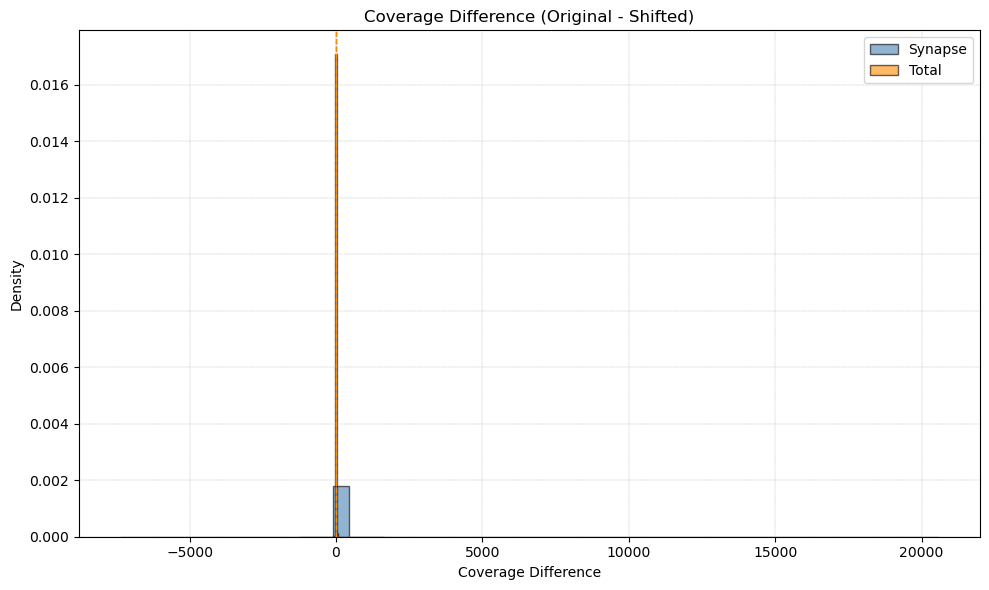

🧪 Statistical tests between Synapse and Total coverage differences:

🔹 Paired t-test: t = 2.1250, p = 3.3596e-02
🔸 Mann–Whitney U test: U = 636720120.0, p = 8.3987e-65


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, mannwhitneyu

# 🔹 Load CSVs
original = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_results_position_matched.csv")
shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_shifted200_position_matched_results.csv")

# 🔹 Identify synapse and total columns
synapse_cols = [col for col in original.columns if "syn" in col]
total_cols = [col for col in original.columns if "total" in col]

# 🔹 Compute average coverage per row
original["synapse_avg"] = original[synapse_cols].mean(axis=1)
original["total_avg"] = original[total_cols].mean(axis=1)

shifted["synapse_avg"] = shifted[synapse_cols].mean(axis=1)
shifted["total_avg"] = shifted[total_cols].mean(axis=1)

# 🔹 Compute differences
synapse_diff = original["synapse_avg"] - shifted["synapse_avg"]
total_diff = original["total_avg"] - shifted["total_avg"]

# 🔹 Plot overlaid histograms
plt.figure(figsize=(10, 6))

bins = 50
plt.hist(synapse_diff, bins=bins, alpha=0.6, label="Synapse", color="steelblue", edgecolor="black", density=True)
plt.hist(total_diff, bins=bins, alpha=0.6, label="Total", color="darkorange", edgecolor="black", density=True)

# 🔹 Add vertical mean lines
plt.axvline(synapse_diff.mean(), color='steelblue', linestyle='dashed', linewidth=1)
plt.axvline(total_diff.mean(), color='darkorange', linestyle='dashed', linewidth=1)

plt.title("Coverage Difference (Original - Shifted)")
plt.xlabel("Coverage Difference")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.3)
plt.tight_layout()
plt.show()

# 🔹 Statistical tests
print("🧪 Statistical tests between Synapse and Total coverage differences:\n")

# Paired t-test
t_stat, t_pval = ttest_rel(synapse_diff, total_diff)
print(f"🔹 Paired t-test: t = {t_stat:.4f}, p = {t_pval:.4e}")

# Mann–Whitney U test
u_stat, u_pval = mannwhitneyu(synapse_diff, total_diff, alternative='two-sided')
print(f"🔸 Mann–Whitney U test: U = {u_stat}, p = {u_pval:.4e}")

In [77]:
import os
import subprocess
import pandas as pd
import json

# 🔹 Define paths
home_dir = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/synapse_riboseq"
output_dir = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/coverage_results"
output_csv = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_results.csv"
bed_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_position_matched.bed"
total_reads_file = os.path.join(output_dir, "total_reads.json")

# 🔹 Load total mapped reads
if not os.path.exists(total_reads_file):
    print(f"❌ Missing {total_reads_file}. Run get_total_reads.py first.")
    exit(1)

with open(total_reads_file, "r") as f:
    total_reads_dict = json.load(f)

# 🔹 List of BAM files
bam_files = list(total_reads_dict.keys())

# 🔹 Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# 🔹 Load BED6 file (chrom, start, end, name, score, strand)
bed_df = pd.read_csv(bed_file, sep="\t", header=None)

if bed_df.shape[1] >= 6:
    bed_df = bed_df.iloc[:, [0, 1, 2, 5]]  # Strand is column 6
else:
    bed_df = bed_df.iloc[:, [0, 1, 2]]
    bed_df[3] = "+"  # Default strand if missing

bed_df.columns = ["chrom", "start", "end", "strand"]
print(f"✅ BED file loaded: {bed_df.shape[0]} regions")
print(bed_df.head())

# 🔹 Store per-sample coverage results
coverage_dfs = {}

for bam in bam_files:
    bam_filename = os.path.basename(bam)
    output_file = os.path.join(output_dir, f"{bam_filename}.coverage.txt")

    print(f"\n🔄 Processing {bam_filename}...")

    # 🔹 Run strand-specific coverage
    cmd = f"bedtools coverage -s -a {bed_file} -b {bam} > {output_file}"
    subprocess.run(cmd, shell=True, check=True)

    # 🔹 Read and process coverage results
    coverage_df = pd.read_csv(output_file, sep="\t", header=None)
    if coverage_df.shape[1] < 7:
        print(f"❌ Unexpected format in {output_file}. Skipping...")
        continue

    # Extract columns: chrom, start, end, strand (col 6), coverage (col 7)
    coverage_df = coverage_df.iloc[:, [0, 1, 2, 5, 6]]
    coverage_df.columns = ["chrom", "start", "end", "strand", "coverage"]

    # Convert to numeric
    coverage_df["coverage"] = pd.to_numeric(coverage_df["coverage"], errors="coerce")

    # 🔹 Normalize using total mapped reads (RPM)
    total_reads = total_reads_dict.get(bam, 0)
    if total_reads == 0:
        print(f"❌ Skipping {bam_filename} due to zero mapped reads.")
        continue

    coverage_df["normalized_coverage"] = (coverage_df["coverage"] / total_reads) * 1e6

    # 🔹 Save intermediate file
    norm_out = os.path.join(output_dir, f"{bam_filename}_normalized.csv")
    coverage_df.to_csv(norm_out, index=False)
    print(f"✅ Saved normalized coverage: {norm_out}")

    # 🔹 Print header of normalized DataFrame
    print(f"\n🧾 Header of normalized DataFrame for {bam_filename}:")
    print(coverage_df.head())

    # Store for merging
    coverage_dfs[bam_filename] = coverage_df

# 🔹 Merge all results into one DataFrame
final_df = bed_df.copy()

for bam_filename, coverage_df in coverage_dfs.items():
    # Build mapping from (chrom, start, end, strand) → coverage
    cov_map = {
        (str(row["chrom"]), int(row["start"]), int(row["end"]), str(row["strand"])): row["normalized_coverage"]
        for _, row in coverage_df.iterrows()
    }

    # Add column
    final_df[bam_filename] = [
        cov_map.get((str(row["chrom"]), int(row["start"]), int(row["end"]), str(row["strand"])), float('nan'))
        for _, row in final_df.iterrows()
    ]
    print(f"✅ Added coverage from {bam_filename}")

# 🔹 Save final result
final_df.to_csv(output_csv, index=False)
print(f"\n✅ Final ribosome coverage results saved to:\n{output_csv}")

print (final_df.head())


✅ BED file loaded: 3481 regions
  chrom      start        end strand
0    12    8946353    8946383      -
1    12    8946338    8946368      -
2    12    8946323    8946353      -
3     6  143511585  143511615      -
4     6  143511570  143511600      -

🔄 Processing fp_chx_syn_rep1_hg19_and_tb40.sorted.bam...
✅ Saved normalized coverage: /tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/coverage_results/fp_chx_syn_rep1_hg19_and_tb40.sorted.bam_normalized.csv

🧾 Header of normalized DataFrame for fp_chx_syn_rep1_hg19_and_tb40.sorted.bam:
  chrom      start        end strand  coverage  normalized_coverage
0    12    8946353    8946383      -       167             6.882016
1    12    8946338    8946368      -       175             7.211694
2    12    8946323    8946353      -       123             5.068790
3     6  143511585  143511615      -        32             1.318710
4     6  143511570  143511600      -        40             1.648387

🔄 Processing fp_chx_syn_rep2_hg19_and_tb

In [79]:
import pandas as pd

# Path to your original motif BED file
bed_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_position_matched.bed"
output_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_regions_position_matched_shifted200.bed"

# Load BED file (assuming BED6 format)
cols = ["chrom", "start", "end", "name", "score", "strand"]
bed_df = pd.read_csv(bed_file, sep="\t", header=None, names=cols)

# Shift start and end by +200 for "+" strand, and -200 for "-" strand
def shift(row, shift_nt=200):
    if row["strand"] == "+":
        row["start"] += shift_nt
        row["end"] += shift_nt
    elif row["strand"] == "-":
        row["start"] -= shift_nt
        row["end"] -= shift_nt
    return row

bed_df = bed_df.apply(shift, axis=1)

# Clip to ensure no negative coordinates
bed_df["start"] = bed_df["start"].clip(lower=0)
bed_df["end"] = bed_df["end"].clip(lower=0)

# Save to new file
bed_df.to_csv(output_file, sep="\t", header=False, index=False)
print(f"✅ Shifted BED file saved to: {output_file}")


✅ Shifted BED file saved to: /tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_regions_position_matched_shifted200.bed


In [80]:
import os
import subprocess
import pandas as pd
import json

# 🔹 Define paths
home_dir = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/synapse_riboseq"
output_dir = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/coverage_results"
output_csv = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_shifted200_results.csv"
bed_file = "/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_motif_regions_position_matched_shifted200.bed"
total_reads_file = os.path.join(output_dir, "total_reads.json")

# 🔹 Load total mapped reads
if not os.path.exists(total_reads_file):
    print(f"❌ Missing {total_reads_file}. Run get_total_reads.py first.")
    exit(1)

with open(total_reads_file, "r") as f:
    total_reads_dict = json.load(f)

# 🔹 List of BAM files
bam_files = list(total_reads_dict.keys())

# 🔹 Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# 🔹 Load BED6 file (chrom, start, end, name, score, strand)
bed_df = pd.read_csv(bed_file, sep="\t", header=None)

if bed_df.shape[1] >= 6:
    bed_df = bed_df.iloc[:, [0, 1, 2, 5]]  # Strand is column 6
else:
    bed_df = bed_df.iloc[:, [0, 1, 2]]
    bed_df[3] = "+"  # Default strand if missing

bed_df.columns = ["chrom", "start", "end", "strand"]
print(f"✅ BED file loaded: {bed_df.shape[0]} regions")
print(bed_df.head())

# 🔹 Store per-sample coverage results
coverage_dfs = {}

for bam in bam_files:
    bam_filename = os.path.basename(bam)
    output_file = os.path.join(output_dir, f"{bam_filename}.coverage.txt")

    print(f"\n🔄 Processing {bam_filename}...")

    # 🔹 Run strand-specific coverage
    cmd = f"bedtools coverage -s -a {bed_file} -b {bam} > {output_file}"
    subprocess.run(cmd, shell=True, check=True)

    # 🔹 Read and process coverage results
    coverage_df = pd.read_csv(output_file, sep="\t", header=None)
    if coverage_df.shape[1] < 7:
        print(f"❌ Unexpected format in {output_file}. Skipping...")
        continue

    # Extract columns: chrom, start, end, strand (col 6), coverage (col 7)
    coverage_df = coverage_df.iloc[:, [0, 1, 2, 5, 6]]
    coverage_df.columns = ["chrom", "start", "end", "strand", "coverage"]

    # Convert to numeric
    coverage_df["coverage"] = pd.to_numeric(coverage_df["coverage"], errors="coerce")

    # 🔹 Normalize using total mapped reads (RPM)
    total_reads = total_reads_dict.get(bam, 0)
    if total_reads == 0:
        print(f"❌ Skipping {bam_filename} due to zero mapped reads.")
        continue

    coverage_df["normalized_coverage"] = (coverage_df["coverage"] / total_reads) * 1e6

    # 🔹 Save intermediate file
    norm_out = os.path.join(output_dir, f"{bam_filename}_normalized.csv")
    coverage_df.to_csv(norm_out, index=False)
    print(f"✅ Saved normalized coverage: {norm_out}")

    # 🔹 Print header of normalized DataFrame
    print(f"\n🧾 Header of normalized DataFrame for {bam_filename}:")
    print(coverage_df.head())

    # Store for merging
    coverage_dfs[bam_filename] = coverage_df

# 🔹 Merge all results into one DataFrame
final_df = bed_df.copy()

for bam_filename, coverage_df in coverage_dfs.items():
    # Build mapping from (chrom, start, end, strand) → coverage
    cov_map = {
        (str(row["chrom"]), int(row["start"]), int(row["end"]), str(row["strand"])): row["normalized_coverage"]
        for _, row in coverage_df.iterrows()
    }

    # Add column
    final_df[bam_filename] = [
        cov_map.get((str(row["chrom"]), int(row["start"]), int(row["end"]), str(row["strand"])), float('nan'))
        for _, row in final_df.iterrows()
    ]
    print(f"✅ Added coverage from {bam_filename}")

# 🔹 Save final result
final_df.to_csv(output_csv, index=False)
print(f"\n✅ Final ribosome coverage results saved to:\n{output_csv}")

print (final_df.head())


✅ BED file loaded: 3481 regions
  chrom      start        end strand
0    12    8946153    8946183      -
1    12    8946138    8946168      -
2    12    8946123    8946153      -
3     6  143511385  143511415      -
4     6  143511370  143511400      -

🔄 Processing fp_chx_syn_rep1_hg19_and_tb40.sorted.bam...
✅ Saved normalized coverage: /tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/coverage_results/fp_chx_syn_rep1_hg19_and_tb40.sorted.bam_normalized.csv

🧾 Header of normalized DataFrame for fp_chx_syn_rep1_hg19_and_tb40.sorted.bam:
  chrom      start        end strand  coverage  normalized_coverage
0    12    8946153    8946183      -         0              0.00000
1    12    8946138    8946168      -         0              0.00000
2    12    8946123    8946153      -         0              0.00000
3     6  143511385  143511415      -         1              0.04121
4     6  143511370  143511400      -         0              0.00000

🔄 Processing fp_chx_syn_rep2_hg19_and_tb

/tmp/ipykernel_1975571/572620715.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diff_df, x="Region Type", y="Coverage Difference", palette="Set2")


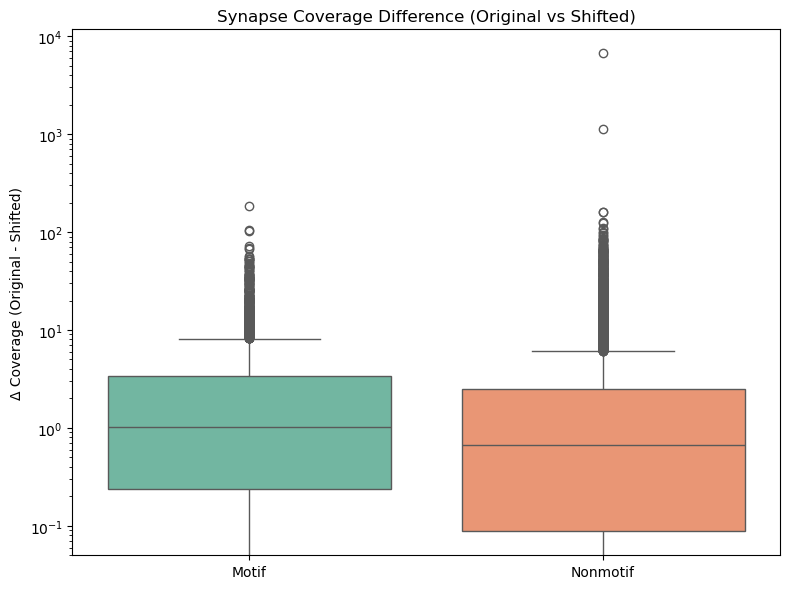

📊 Statistical Comparison (Synapse Coverage Difference):
T-test:           t = 1.2055, p = 2.2804e-01
Mann-Whitney U:   U = 26698602, p = 9.8766e-26


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# 🔹 Load motif data
motif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_results.csv")
motif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_shifted200_results.csv")

# 🔹 Load position-matched nonmotif data
nonmotif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_results_position_matched.csv")
nonmotif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_shifted200_position_matched_results.csv")

# 🔹 Filter to synapse columns only
synapse_cols = [col for col in motif_orig.columns if "syn" in col]

# 🔹 Compute average difference
motif_diff = motif_orig[synapse_cols].mean(axis=1) - motif_shifted[synapse_cols].mean(axis=1)
nonmotif_diff = nonmotif_orig[synapse_cols].mean(axis=1) - nonmotif_shifted[synapse_cols].mean(axis=1)

# 🔹 Combine into a single DataFrame for plotting
diff_df = pd.DataFrame({
    "Coverage Difference": pd.concat([motif_diff, nonmotif_diff], ignore_index=True),
    "Region Type": ["Motif"] * len(motif_diff) + ["Nonmotif"] * len(nonmotif_diff)
})

# 🔹 Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=diff_df, x="Region Type", y="Coverage Difference", palette="Set2")
plt.title("Synapse Coverage Difference (Original vs Shifted)")
plt.ylabel("Δ Coverage (Original - Shifted)")
plt.xlabel("")
plt.yscale('log')
plt.tight_layout()
plt.show()

# 🔹 Statistical tests
t_stat, t_pval = ttest_ind(motif_diff, nonmotif_diff, equal_var=False)
u_stat, u_pval = mannwhitneyu(motif_diff, nonmotif_diff, alternative='two-sided')

print("📊 Statistical Comparison (Synapse Coverage Difference):")
print(f"T-test:           t = {t_stat:.4f}, p = {t_pval:.4e}")
print(f"Mann-Whitney U:   U = {u_stat:.0f}, p = {u_pval:.4e}")


In [82]:
# 🔹 Descriptive statistics
motif_mean = motif_diff.mean()
motif_median = motif_diff.median()
nonmotif_mean = nonmotif_diff.mean()
nonmotif_median = nonmotif_diff.median()

print("\n📈 Descriptive Statistics:")
print(f"🔹 Motif     - Mean: {motif_mean:.4f}, Median: {motif_median:.4f}")
print(f"🔹 Nonmotif  - Mean: {nonmotif_mean:.4f}, Median: {nonmotif_median:.4f}")



📈 Descriptive Statistics:
🔹 Motif     - Mean: 3.1579, Median: 1.0314
🔹 Nonmotif  - Mean: 2.3380, Median: 0.6764


In [83]:
# 🔹 Sample sizes
motif_count = len(motif_diff)
nonmotif_count = len(nonmotif_diff)

# 🔹 More descriptive statistics
motif_std = motif_diff.std()
motif_min = motif_diff.min()
motif_max = motif_diff.max()
motif_q1 = motif_diff.quantile(0.25)
motif_q3 = motif_diff.quantile(0.75)
motif_iqr = motif_q3 - motif_q1

nonmotif_std = nonmotif_diff.std()
nonmotif_min = nonmotif_diff.min()
nonmotif_max = nonmotif_diff.max()
nonmotif_q1 = nonmotif_diff.quantile(0.25)
nonmotif_q3 = nonmotif_diff.quantile(0.75)
nonmotif_iqr = nonmotif_q3 - nonmotif_q1

# 🔹 Comprehensive statistics report
print("\n📊 Comprehensive Statistics Report:")
print("=" * 60)
print(f"🔹 MOTIF REGIONS (n={motif_count}):")
print(f"  - Mean:             {motif_mean:.4f}")
print(f"  - Median:           {motif_median:.4f}")
print(f"  - Standard Dev:     {motif_std:.4f}")
print(f"  - Min:              {motif_min:.4f}")
print(f"  - Max:              {motif_max:.4f}")
print(f"  - 25th Percentile:  {motif_q1:.4f}")
print(f"  - 75th Percentile:  {motif_q3:.4f}")
print(f"  - IQR:              {motif_iqr:.4f}")
print("\n")
print(f"🔹 NONMOTIF REGIONS (n={nonmotif_count}):")
print(f"  - Mean:             {nonmotif_mean:.4f}")
print(f"  - Median:           {nonmotif_median:.4f}")
print(f"  - Standard Dev:     {nonmotif_std:.4f}")
print(f"  - Min:              {nonmotif_min:.4f}")
print(f"  - Max:              {nonmotif_max:.4f}")
print(f"  - 25th Percentile:  {nonmotif_q1:.4f}")
print(f"  - 75th Percentile:  {nonmotif_q3:.4f}")
print(f"  - IQR:              {nonmotif_iqr:.4f}")
print("=" * 60)


📊 Comprehensive Statistics Report:
🔹 MOTIF REGIONS (n=3481):
  - Mean:             3.1579
  - Median:           1.0314
  - Standard Dev:     8.0057
  - Min:              -49.6692
  - Max:              184.0565
  - 25th Percentile:  0.2351
  - 75th Percentile:  3.3981
  - IQR:              3.1630


🔹 NONMOTIF REGIONS (n=13759):
  - Mean:             2.3380
  - Median:           0.6764
  - Standard Dev:     78.1764
  - Min:              -5844.3255
  - Max:              6708.2182
  - 25th Percentile:  0.0877
  - 75th Percentile:  2.5168
  - IQR:              2.4291


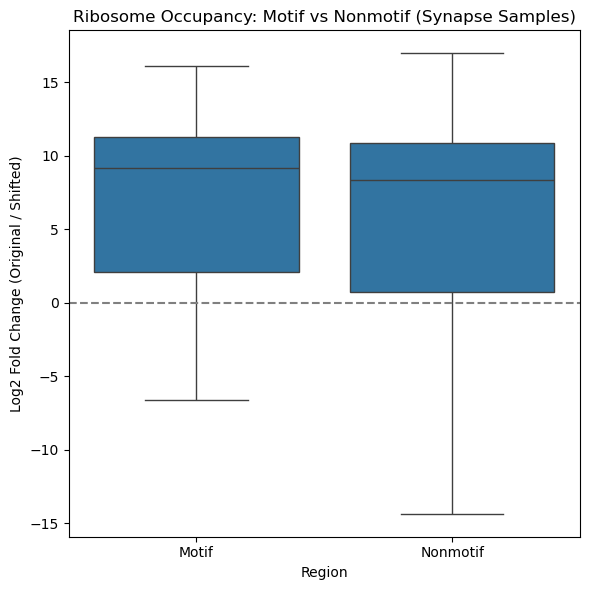


📊 Descriptive Statistics (Log2FC):

🔹 Motif:
count    3481.000000
mean        7.485468
std         4.942005
min        -6.659975
25%         2.049563
50%         9.139969
75%        11.292338
max        16.127546
dtype: float64

🔹 Nonmotif:
count    13759.000000
mean         6.640217
std          5.209040
min        -16.438682
25%          0.735373
50%          8.318456
75%         10.839405
max         16.959421
dtype: float64

🧪 Statistical Test Results:
Welch’s t-test:      p = 6.4660e-19
Mann-Whitney U test: p = 1.6665e-18


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# 🔹 Load data
motif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_results.csv")
motif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_shifted200_results.csv")

# ✅ Updated file paths for position-matched nonmotif files
nonmotif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_results_position_matched.csv")
nonmotif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_shifted200_position_matched_results.csv")

# 🔹 Identify synapse columns
synapse_cols = [col for col in motif_orig.columns if "syn" in col]

# 🔹 Compute mean per row for synapse samples
motif_orig_mean = motif_orig[synapse_cols].mean(axis=1)
motif_shifted_mean = motif_shifted[synapse_cols].mean(axis=1)
nonmotif_orig_mean = nonmotif_orig[synapse_cols].mean(axis=1)
nonmotif_shifted_mean = nonmotif_shifted[synapse_cols].mean(axis=1)

# 🔹 Add pseudocount to avoid division by 0
pseudocount = 1e-3
motif_log2fc = np.log2((motif_orig_mean + pseudocount) / (motif_shifted_mean + pseudocount))
nonmotif_log2fc = np.log2((nonmotif_orig_mean + pseudocount) / (nonmotif_shifted_mean + pseudocount))

# 🔹 Combine into a DataFrame for plotting
df_plot = pd.DataFrame({
    "log2FC": pd.concat([motif_log2fc, nonmotif_log2fc], ignore_index=True),
    "Region": ["Motif"] * len(motif_log2fc) + ["Nonmotif"] * len(nonmotif_log2fc)
})

# 🔹 Plot boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_plot, x="Region", y="log2FC", showfliers=False)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Log2 Fold Change (Original / Shifted)")
plt.title("Ribosome Occupancy: Motif vs Nonmotif (Synapse Samples)")
plt.tight_layout()
plt.show()

# 🔹 Statistical tests
t_stat, t_pval = ttest_ind(motif_log2fc, nonmotif_log2fc, equal_var=False)
mw_stat, mw_pval = mannwhitneyu(motif_log2fc, nonmotif_log2fc, alternative='two-sided')

# 🔹 Descriptive stats
motif_stats = motif_log2fc.describe()
nonmotif_stats = nonmotif_log2fc.describe()

# 🔹 Print summary
print("\n📊 Descriptive Statistics (Log2FC):")
print("\n🔹 Motif:")
print(motif_stats)
print("\n🔹 Nonmotif:")
print(nonmotif_stats)

print("\n🧪 Statistical Test Results:")
print(f"Welch’s t-test:      p = {t_pval:.4e}")
print(f"Mann-Whitney U test: p = {mw_pval:.4e}")


/tmp/ipykernel_690298/4018406017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x="Region", y="log2FC", palette="Set2", inner="quartile", scale="width")
/tmp/ipykernel_690298/4018406017.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df_plot, x="Region", y="log2FC", palette="Set2", inner="quartile", scale="width")


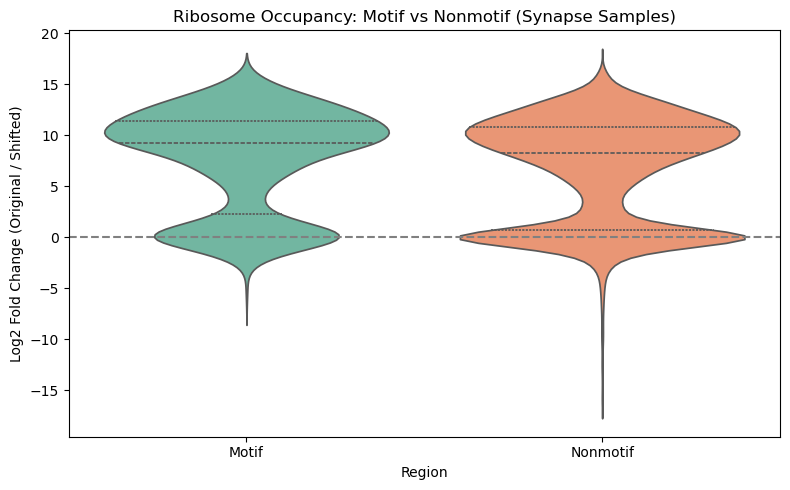

In [35]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df_plot, x="Region", y="log2FC", palette="Set2", inner="quartile", scale="width")
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel("Log2 Fold Change (Original / Shifted)")
plt.title("Ribosome Occupancy: Motif vs Nonmotif (Synapse Samples)")
plt.tight_layout()
plt.show()


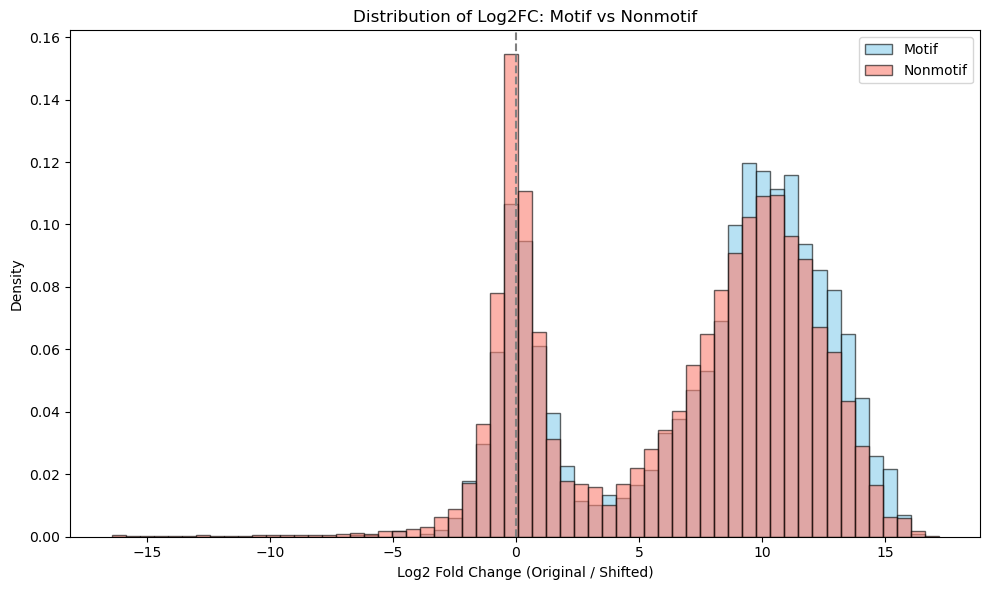

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define shared bins across the full range of both datasets
min_fc = min(motif_log2fc.min(), nonmotif_log2fc.min())
max_fc = max(motif_log2fc.max(), nonmotif_log2fc.max())
bins = np.linspace(min_fc, max_fc, 60)

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(motif_log2fc, bins=bins, alpha=0.6, label='Motif', color='skyblue', edgecolor='black', density=True)
plt.hist(nonmotif_log2fc, bins=bins, alpha=0.6, label='Nonmotif', color='salmon', edgecolor='black', density=True)

# Reference line
plt.axvline(0, color='gray', linestyle='--')

# Labels and legend
plt.xlabel("Log2 Fold Change (Original / Shifted)")
plt.ylabel("Density")
plt.title("Distribution of Log2FC: Motif vs Nonmotif")
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_1515674/797563358.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_plot, x="Region", y="log2FC", showfliers=False,


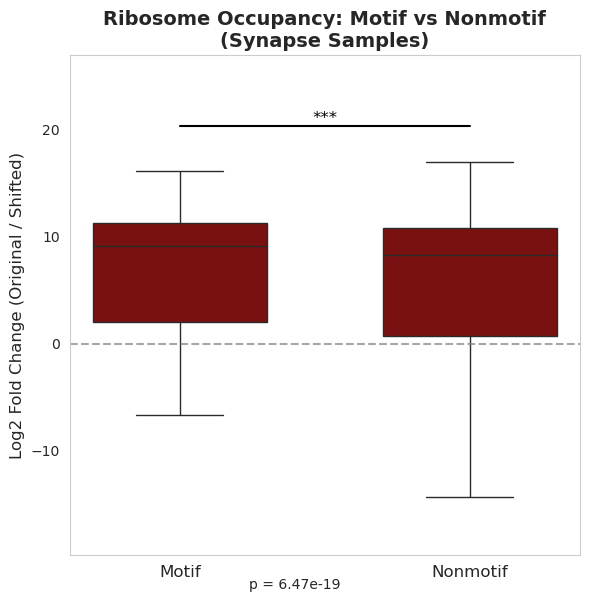


📊 Descriptive Statistics (Log2FC):

🔹 Motif:
count    3481.000000
mean        7.485468
std         4.942005
min        -6.659975
25%         2.049563
50%         9.139969
75%        11.292338
max        16.127546
dtype: float64

🔹 Nonmotif:
count    13759.000000
mean         6.640217
std          5.209040
min        -16.438682
25%          0.735373
50%          8.318456
75%         10.839405
max         16.959421
dtype: float64

🧪 Statistical Test Results:
Welch's t-test:      p = 6.4660e-19
Mann-Whitney U test: p = 1.6665e-18


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap

# 🔹 Load data
motif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_results.csv")
motif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_shifted200_results.csv")
# ✅ Updated file paths for position-matched nonmotif files
nonmotif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_results_position_matched.csv")
nonmotif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_shifted200_position_matched_results.csv")

# 🔹 Identify synapse columns
synapse_cols = [col for col in motif_orig.columns if "syn" in col]

# 🔹 Compute mean per row for synapse samples
motif_orig_mean = motif_orig[synapse_cols].mean(axis=1)
motif_shifted_mean = motif_shifted[synapse_cols].mean(axis=1)
nonmotif_orig_mean = nonmotif_orig[synapse_cols].mean(axis=1)
nonmotif_shifted_mean = nonmotif_shifted[synapse_cols].mean(axis=1)

# 🔹 Add pseudocount to avoid division by 0
pseudocount = 1e-3
motif_log2fc = np.log2((motif_orig_mean + pseudocount) / (motif_shifted_mean + pseudocount))
nonmotif_log2fc = np.log2((nonmotif_orig_mean + pseudocount) / (nonmotif_shifted_mean + pseudocount))

# 🔹 Combine into a DataFrame for plotting
df_plot = pd.DataFrame({
    "log2FC": pd.concat([motif_log2fc, nonmotif_log2fc], ignore_index=True),
    "Region": ["Motif"] * len(motif_log2fc) + ["Nonmotif"] * len(nonmotif_log2fc)
})

# 🔹 Create dark red color palette (burgundy to lighter red)
dark_red_palette = ["#8B0000", "#8B0000"]  # Dark red/burgundy

# 🔹 Statistical tests
t_stat, t_pval = ttest_ind(motif_log2fc, nonmotif_log2fc, equal_var=False)
mw_stat, mw_pval = mannwhitneyu(motif_log2fc, nonmotif_log2fc, alternative='two-sided')

# 🔹 Plot boxplot with dark red colors
plt.figure(figsize=(6, 6))

# Set the style
sns.set_style("whitegrid")

# Create the boxplot with custom dark red colors
ax = sns.boxplot(data=df_plot, x="Region", y="log2FC", showfliers=False, 
                 palette=dark_red_palette, width=0.6)

# Add significance bar
def add_significance_bar(ax, x1, x2, y, p_value, gap=0.05, bar_height=0.05):
    # Draw the bar
    bar_y = y + gap
    ax.plot([x1, x2], [bar_y, bar_y], 'k-', linewidth=1.5)
    
    # Add asterisks based on p-value
    if p_value < 0.001:
        sig_text = '***'
    elif p_value < 0.01:
        sig_text = '**'
    elif p_value < 0.05:
        sig_text = '*'
    else:
        sig_text = 'ns'
        
    # Add the text
    text_y = bar_y + bar_height
    ax.text((x1 + x2) / 2, text_y, sig_text, ha='center', va='bottom', color='black', fontsize=12)

# Get the maximum y-value to position the significance bar
y_max = df_plot['log2FC'].max()
y_min = df_plot['log2FC'].min()
y_range = y_max - y_min
bar_position = y_max + y_range * 0.1

# Add the significance bar
add_significance_bar(ax, 0, 1, bar_position, t_pval)

# Increase y-axis limits to make room for the significance bar
plt.ylim(y_min - y_range * 0.1, bar_position + y_range * 0.2)

# Customize the plot
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)
plt.ylabel("Log2 Fold Change (Original / Shifted)", fontsize=12)
plt.xlabel("", fontsize=12)  # Remove x-label as it's self-explanatory
plt.title("Ribosome Occupancy: Motif vs Nonmotif\n(Synapse Samples)", fontsize=14, fontweight='bold')

# Improve x-axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)


# Add p-value text at the bottom of the plot
p_val_text = f"p = {t_pval:.2e}" if t_pval < 0.001 else f"p = {t_pval:.4f}"
plt.figtext(0.5, 0.01, p_val_text, ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('ribosome_occupancy_motif_vs_nonmotif.png', dpi=300, bbox_inches='tight')
plt.grid(False)
plt.show()

# 🔹 Descriptive stats
motif_stats = motif_log2fc.describe()
nonmotif_stats = nonmotif_log2fc.describe()

# 🔹 Print summary
print("\n📊 Descriptive Statistics (Log2FC):")
print("\n🔹 Motif:")
print(motif_stats)
print("\n🔹 Nonmotif:")
print(nonmotif_stats)
print("\n🧪 Statistical Test Results:")
print(f"Welch's t-test:      p = {t_pval:.4e}")
print(f"Mann-Whitney U test: p = {mw_pval:.4e}")

/tmp/ipykernel_1975571/2202247989.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


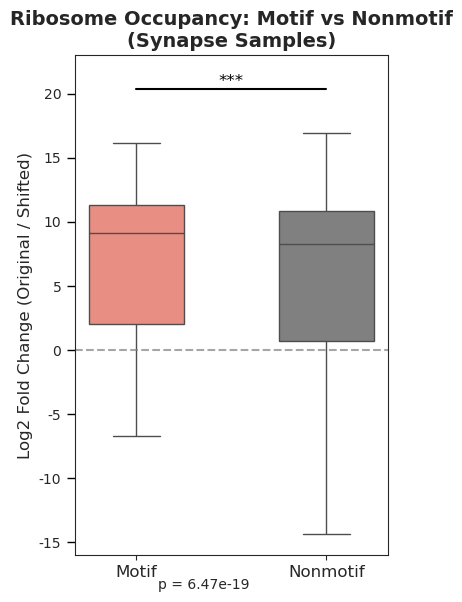


📊 Descriptive Statistics (Log2FC):

🔹 Motif:
count    3481.000000
mean        7.485468
std         4.942005
min        -6.659975
25%         2.049563
50%         9.139969
75%        11.292338
max        16.127546
dtype: float64

🔹 Nonmotif:
count    13759.000000
mean         6.640217
std          5.209040
min        -16.438682
25%          0.735373
50%          8.318456
75%         10.839405
max         16.959421
dtype: float64

🧪 Statistical Test Results:
Welch's t-test:      p = 6.4660e-19
Mann-Whitney U test: p = 1.6665e-18


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import math

# 🔹 Load data
motif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_results.csv")
motif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_shifted200_results.csv")
nonmotif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_results_position_matched.csv")
nonmotif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_shifted200_position_matched_results.csv")

# 🔹 Identify synapse columns
synapse_cols = [col for col in motif_orig.columns if "syn" in col]

# 🔹 Compute mean per row for synapse samples
motif_orig_mean = motif_orig[synapse_cols].mean(axis=1)
motif_shifted_mean = motif_shifted[synapse_cols].mean(axis=1)
nonmotif_orig_mean = nonmotif_orig[synapse_cols].mean(axis=1)
nonmotif_shifted_mean = nonmotif_shifted[synapse_cols].mean(axis=1)

# 🔹 Add pseudocount to avoid division by 0
pseudocount = 1e-3
motif_log2fc = np.log2((motif_orig_mean + pseudocount) / (motif_shifted_mean + pseudocount))
nonmotif_log2fc = np.log2((nonmotif_orig_mean + pseudocount) / (nonmotif_shifted_mean + pseudocount))

# 🔹 Combine into a DataFrame for plotting
df_plot = pd.DataFrame({
    "log2FC": pd.concat([motif_log2fc, nonmotif_log2fc], ignore_index=True),
    "Region": ["Motif"] * len(motif_log2fc) + ["Nonmotif"] * len(nonmotif_log2fc)
})

# 🔹 Create dark red color palette (burgundy to lighter red)
dark_red_palette = ["salmon", "grey"]  # Dark red/burgundy

# 🔹 Statistical tests
t_stat, t_pval = ttest_ind(motif_log2fc, nonmotif_log2fc, equal_var=False)
mw_stat, mw_pval = mannwhitneyu(motif_log2fc, nonmotif_log2fc, alternative='two-sided')

# 🔹 Plot boxplot with dark red colors
plt.figure(figsize=(4, 6))

# Change style to 'ticks' so there's no grid by default
sns.set_style("ticks")

ax = sns.boxplot(
    data=df_plot, 
    x="Region", 
    y="log2FC", 
    showfliers=False, 
    palette=dark_red_palette, 
    width=0.5
)

# Turn off the grid if it appears
ax.grid(False)

# Add significance bar
def add_significance_bar(ax, x1, x2, y, p_value, gap=0.05, bar_height=0.05):
    bar_y = y + gap
    ax.plot([x1, x2], [bar_y, bar_y], 'k-', linewidth=1.5)
    if p_value < 0.001:
        sig_text = '***'
    elif p_value < 0.01:
        sig_text = '**'
    elif p_value < 0.05:
        sig_text = '*'
    else:
        sig_text = 'ns'
    text_y = bar_y + bar_height
    ax.text((x1 + x2) / 2, text_y, sig_text, ha='center', va='bottom', color='black', fontsize=12)

y_max = df_plot['log2FC'].max()
y_min = df_plot['log2FC'].min()
y_range = y_max - y_min
bar_position = y_max + y_range * 0.1

add_significance_bar(ax, 0, 1, bar_position, t_pval)

plt.ylim(y_min - y_range * 0.1, bar_position + y_range * 0.2)

# Draw horizontal line at 0
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)

plt.ylabel("Log2 Fold Change (Original / Shifted)", fontsize=12)
plt.xlabel("", fontsize=12)
plt.title("Ribosome Occupancy: Motif vs Nonmotif\n(Synapse Samples)", fontsize=14, fontweight='bold')

# 🔹 Add explicit tick marks at integer values
y_min_rounded = int(np.floor(y_min - y_range * 0.1))
y_max_rounded = int(np.ceil(bar_position + y_range * 0.2))

# Create an array of integer ticks from y_min_rounded to y_max_rounded
ticks = np.arange(y_min_rounded, y_max_rounded + 5, 5)
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

# Make tick marks visible and longer
ax.tick_params(axis='y', which='major', length=6, width=1, color='black', direction='out')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

# p-value text at bottom
p_val_text = f"p = {t_pval:.2e}" if t_pval < 0.001 else f"p = {t_pval:.4f}"
plt.figtext(0.5, 0.01, p_val_text, ha='center', fontsize=10)

plt.ylim(-16, 23)

plt.tight_layout()
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/ribosome_occupancy_motif_vs_nonmotif.svg', dpi=300, bbox_inches='tight')
plt.show()

# 🔹 Descriptive stats
motif_stats = motif_log2fc.describe()
nonmotif_stats = nonmotif_log2fc.describe()

print("\n📊 Descriptive Statistics (Log2FC):")
print("\n🔹 Motif:")
print(motif_stats)
print("\n🔹 Nonmotif:")
print(nonmotif_stats)
print("\n🧪 Statistical Test Results:")
print(f"Welch's t-test:      p = {t_pval:.4e}")
print(f"Mann-Whitney U test: p = {mw_pval:.4e}")


/tmp/ipykernel_1975571/4004038867.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


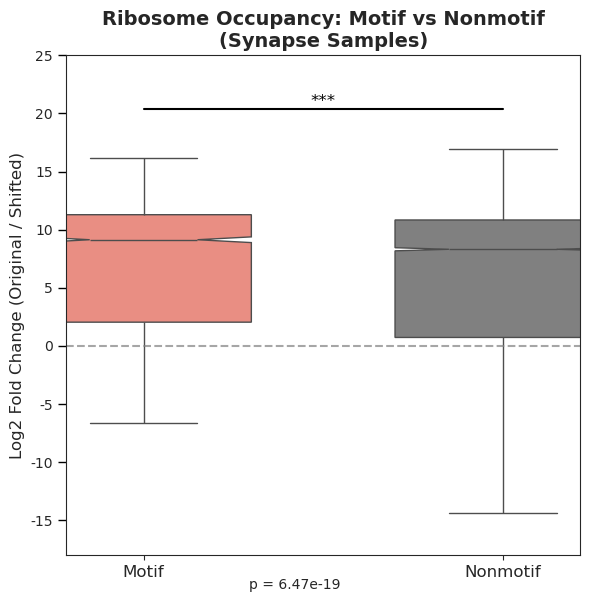


📊 Descriptive Statistics (Log2FC):

🔹 Motif:
count    3481.000000
mean        7.485468
std         4.942005
min        -6.659975
25%         2.049563
50%         9.139969
75%        11.292338
max        16.127546
dtype: float64

🔹 Nonmotif:
count    13759.000000
mean         6.640217
std          5.209040
min        -16.438682
25%          0.735373
50%          8.318456
75%         10.839405
max         16.959421
dtype: float64

🧪 Statistical Test Results:
Welch's t-test:      p = 6.4660e-19
Mann-Whitney U test: p = 1.6665e-18


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import math

# 🔹 Load data
motif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_results.csv")
motif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_shifted200_results.csv")
nonmotif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_results_position_matched.csv")
nonmotif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_shifted200_position_matched_results.csv")

# 🔹 Identify synapse columns
synapse_cols = [col for col in motif_orig.columns if "syn" in col]

# 🔹 Compute mean per row for synapse samples
motif_orig_mean = motif_orig[synapse_cols].mean(axis=1)
motif_shifted_mean = motif_shifted[synapse_cols].mean(axis=1)
nonmotif_orig_mean = nonmotif_orig[synapse_cols].mean(axis=1)
nonmotif_shifted_mean = nonmotif_shifted[synapse_cols].mean(axis=1)

# 🔹 Add pseudocount to avoid division by 0
pseudocount = 1e-3
motif_log2fc = np.log2((motif_orig_mean + pseudocount) / (motif_shifted_mean + pseudocount))
nonmotif_log2fc = np.log2((nonmotif_orig_mean + pseudocount) / (nonmotif_shifted_mean + pseudocount))

# 🔹 Combine into a DataFrame for plotting
df_plot = pd.DataFrame({
    "log2FC": pd.concat([motif_log2fc, nonmotif_log2fc], ignore_index=True),
    "Region": ["Motif"] * len(motif_log2fc) + ["Nonmotif"] * len(nonmotif_log2fc)
})

# 🔹 Create dark red color palette (burgundy to lighter red)
dark_red_palette = ["salmon", "grey"]  # Dark red/burgundy

# 🔹 Statistical tests
t_stat, t_pval = ttest_ind(motif_log2fc, nonmotif_log2fc, equal_var=False)
mw_stat, mw_pval = mannwhitneyu(motif_log2fc, nonmotif_log2fc, alternative='two-sided')

# 🔹 Plot boxplot with dark red colors
plt.figure(figsize=(6, 6))

# Change style to 'ticks' so there's no grid by default
sns.set_style("ticks")

ax = sns.boxplot(
    data=df_plot, 
    x="Region", 
    y="log2FC", 
    showfliers=False, 
    palette=dark_red_palette, 
    width=0.6,
    notch=True
)



# Turn off the grid if it appears
ax.grid(False)

# Add significance bar
def add_significance_bar(ax, x1, x2, y, p_value, gap=0.05, bar_height=0.05):
    bar_y = y + gap
    ax.plot([x1, x2], [bar_y, bar_y], 'k-', linewidth=1.5)
    if p_value < 0.001:
        sig_text = '***'
    elif p_value < 0.01:
        sig_text = '**'
    elif p_value < 0.05:
        sig_text = '*'
    else:
        sig_text = 'ns'
    text_y = bar_y + bar_height
    ax.text((x1 + x2) / 2, text_y, sig_text, ha='center', va='bottom', color='black', fontsize=12)

y_max = df_plot['log2FC'].max()
y_min = df_plot['log2FC'].min()
y_range = y_max - y_min
bar_position = y_max + y_range * 0.1

add_significance_bar(ax, 0, 1, bar_position, t_pval)

plt.ylim(y_min - y_range * 0.1, bar_position + y_range * 0.2)

# Draw horizontal line at 0
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)

plt.ylabel("Log2 Fold Change (Original / Shifted)", fontsize=12)
plt.xlabel("", fontsize=12)
plt.title("Ribosome Occupancy: Motif vs Nonmotif\n(Synapse Samples)", fontsize=14, fontweight='bold')

# 🔹 Add explicit tick marks at integer values
y_min_rounded = int(np.floor(y_min - y_range * 0.1))
y_max_rounded = int(np.ceil(bar_position + y_range * 0.2))

# Create an array of integer ticks from y_min_rounded to y_max_rounded
ticks = np.arange(y_min_rounded, y_max_rounded + 5, 5)
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

# Make tick marks visible and longer
ax.tick_params(axis='y', which='major', length=6, width=1, color='black', direction='out')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

# p-value text at bottom
p_val_text = f"p = {t_pval:.2e}" if t_pval < 0.001 else f"p = {t_pval:.4f}"
plt.figtext(0.5, 0.01, p_val_text, ha='center', fontsize=10)

plt.ylim(-18, 25)

plt.tight_layout()
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/ribosome_occupancy_motif_vs_nonmotif.svg', dpi=300, bbox_inches='tight')
plt.show()

# 🔹 Descriptive stats
motif_stats = motif_log2fc.describe()
nonmotif_stats = nonmotif_log2fc.describe()

print("\n📊 Descriptive Statistics (Log2FC):")
print("\n🔹 Motif:")
print(motif_stats)
print("\n🔹 Nonmotif:")
print(nonmotif_stats)
print("\n🧪 Statistical Test Results:")
print(f"Welch's t-test:      p = {t_pval:.4e}")
print(f"Mann-Whitney U test: p = {mw_pval:.4e}")


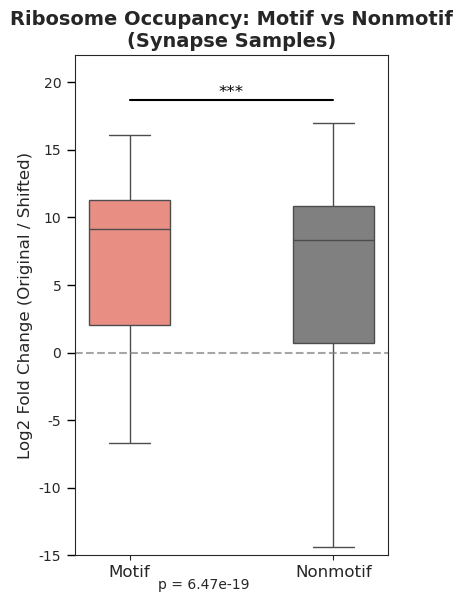


📊 Descriptive Statistics (Log2FC):

🔹 Motif:
count    3481.000000
mean        7.485468
std         4.942005
min        -6.659975
25%         2.049563
50%         9.139969
75%        11.292338
max        16.127546
dtype: float64

🔹 Nonmotif:
count    13759.000000
mean         6.640217
std          5.209040
min        -16.438682
25%          0.735373
50%          8.318456
75%         10.839405
max         16.959421
dtype: float64

🧪 Statistical Test Results:
Welch's t-test:      p = 6.4660e-19
Mann-Whitney U test: p = 1.6665e-18


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import math

# 🔹 Load data
motif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_results.csv")
motif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_shifted200_results.csv")
nonmotif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_results_position_matched.csv")
nonmotif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_shifted200_position_matched_results.csv")

# 🔹 Identify synapse columns
synapse_cols = [col for col in motif_orig.columns if "syn" in col]

# 🔹 Compute mean per row for synapse samples
motif_orig_mean = motif_orig[synapse_cols].mean(axis=1)
motif_shifted_mean = motif_shifted[synapse_cols].mean(axis=1)
nonmotif_orig_mean = nonmotif_orig[synapse_cols].mean(axis=1)
nonmotif_shifted_mean = nonmotif_shifted[synapse_cols].mean(axis=1)

# 🔹 Add pseudocount to avoid division by 0
pseudocount = 1e-3
motif_log2fc = np.log2((motif_orig_mean + pseudocount) / (motif_shifted_mean + pseudocount))
nonmotif_log2fc = np.log2((nonmotif_orig_mean + pseudocount) / (nonmotif_shifted_mean + pseudocount))

# 🔹 Combine into a DataFrame for plotting
df_plot = pd.DataFrame({
    "log2FC": pd.concat([motif_log2fc, nonmotif_log2fc], ignore_index=True),
    "Region": ["Motif"] * len(motif_log2fc) + ["Nonmotif"] * len(nonmotif_log2fc)
})

# 🔹 Create dark red color palette (burgundy to lighter red)
dark_red_palette = ["salmon", "grey"]  # Dark red/burgundy

# 🔹 Statistical tests
t_stat, t_pval = ttest_ind(motif_log2fc, nonmotif_log2fc, equal_var=False)
mw_stat, mw_pval = mannwhitneyu(motif_log2fc, nonmotif_log2fc, alternative='two-sided')

# 🔹 Plot boxplot with dark red colors
plt.figure(figsize=(4, 6))  # Further reduced figure width to bring boxes even closer

# Change style to 'ticks' so there's no grid by default
sns.set_style("ticks")

ax = sns.boxplot(
    data=df_plot, 
    x="Region", 
    y="log2FC", 
    showfliers=False, 
    width=0.4,  # Skinnier boxes
    hue="Region",  # Use Region for hue to fix deprecation warning
    palette=dark_red_palette,
    legend=False  # Don't show the legend
)

# Turn off the grid if it appears
ax.grid(False)

# Add significance bar
def add_significance_bar(ax, x1, x2, y, p_value, gap=0.05, bar_height=0.05):
    bar_y = y + gap
    ax.plot([x1, x2], [bar_y, bar_y], 'k-', linewidth=1.5)
    if p_value < 0.001:
        sig_text = '***'
    elif p_value < 0.01:
        sig_text = '**'
    elif p_value < 0.05:
        sig_text = '*'
    else:
        sig_text = 'ns'
    text_y = bar_y + bar_height
    ax.text((x1 + x2) / 2, text_y, sig_text, ha='center', va='bottom', color='black', fontsize=12)

y_max = df_plot['log2FC'].max()
y_min = df_plot['log2FC'].min()
y_range = y_max - y_min
# Lower the significance bar positioning
bar_position = y_max + y_range * 0.05  # Reduced from 0.1 to 0.05

add_significance_bar(ax, 0, 1, bar_position, t_pval)

# Adjust the plot limits to match the new bar position
plt.ylim(y_min - y_range * 0.1, bar_position + y_range * 0.1)  # Reduced upper padding

# Draw horizontal line at 0
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)

plt.ylabel("Log2 Fold Change (Original / Shifted)", fontsize=12)
plt.xlabel("", fontsize=12)
plt.title("Ribosome Occupancy: Motif vs Nonmotif\n(Synapse Samples)", fontsize=14, fontweight='bold')

# 🔹 Add explicit tick marks at integer values
y_min_rounded = int(np.floor(y_min - y_range * 0.1))
y_max_rounded = int(np.ceil(bar_position + y_range * 0.1))

# Create an array of integer ticks from y_min_rounded to y_max_rounded
ticks = np.arange(y_min_rounded, y_max_rounded + 5, 5)
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

# Make tick marks visible and longer
ax.tick_params(axis='y', which='major', length=6, width=1, color='black', direction='out')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

# p-value text at bottom
p_val_text = f"p = {t_pval:.2e}" if t_pval < 0.001 else f"p = {t_pval:.4f}"
plt.figtext(0.5, 0.01, p_val_text, ha='center', fontsize=10)

# Set fixed y-axis limits if you want to maintain the same overall view
plt.ylim(-15, 22)

plt.tight_layout()
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/ribosome_occupancy_motif_vs_nonmotif.svg', dpi=300, bbox_inches='tight')
plt.show()

# 🔹 Descriptive stats
motif_stats = motif_log2fc.describe()
nonmotif_stats = nonmotif_log2fc.describe()

print("\n📊 Descriptive Statistics (Log2FC):")
print("\n🔹 Motif:")
print(motif_stats)
print("\n🔹 Nonmotif:")
print(nonmotif_stats)
print("\n🧪 Statistical Test Results:")
print(f"Welch's t-test:      p = {t_pval:.4e}")
print(f"Mann-Whitney U test: p = {mw_pval:.4e}")

<Figure size 500x600 with 0 Axes>

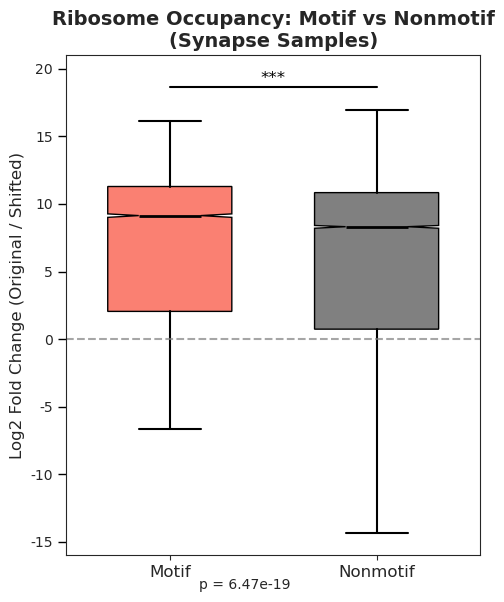


📊 Descriptive Statistics (Log2FC):

🔹 Motif:
count    3481.000000
mean        7.485468
std         4.942005
min        -6.659975
25%         2.049563
50%         9.139969
75%        11.292338
max        16.127546
dtype: float64

🔹 Nonmotif:
count    13759.000000
mean         6.640217
std          5.209040
min        -16.438682
25%          0.735373
50%          8.318456
75%         10.839405
max         16.959421
dtype: float64

🧪 Statistical Test Results:
Welch's t-test:      p = 6.4660e-19
Mann-Whitney U test: p = 1.6665e-18


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import math

# 🔹 Load data
motif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_results.csv")
motif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_ribosome_coverage_motifs_shifted200_results.csv")
nonmotif_orig = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_results_position_matched.csv")
nonmotif_shifted = pd.read_csv("/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/synapse_nonmotif_ribosome_coverage_motifs_shifted200_position_matched_results.csv")

# 🔹 Identify synapse columns
synapse_cols = [col for col in motif_orig.columns if "syn" in col]

# 🔹 Compute mean per row for synapse samples
motif_orig_mean = motif_orig[synapse_cols].mean(axis=1)
motif_shifted_mean = motif_shifted[synapse_cols].mean(axis=1)
nonmotif_orig_mean = nonmotif_orig[synapse_cols].mean(axis=1)
nonmotif_shifted_mean = nonmotif_shifted[synapse_cols].mean(axis=1)

# 🔹 Add pseudocount to avoid division by 0
pseudocount = 1e-3
motif_log2fc = np.log2((motif_orig_mean + pseudocount) / (motif_shifted_mean + pseudocount))
nonmotif_log2fc = np.log2((nonmotif_orig_mean + pseudocount) / (nonmotif_shifted_mean + pseudocount))

# 🔹 Combine into a DataFrame for plotting
df_plot = pd.DataFrame({
    "log2FC": pd.concat([motif_log2fc, nonmotif_log2fc], ignore_index=True),
    "Region": ["Motif"] * len(motif_log2fc) + ["Nonmotif"] * len(nonmotif_log2fc)
})

# 🔹 Create dark red color palette (burgundy to lighter red)
dark_red_palette = ["salmon", "grey"]  # Dark red/burgundy

# 🔹 Statistical tests
t_stat, t_pval = ttest_ind(motif_log2fc, nonmotif_log2fc, equal_var=False)
mw_stat, mw_pval = mannwhitneyu(motif_log2fc, nonmotif_log2fc, alternative='two-sided')

# 🔹 Plot boxplot with dark red colors
plt.figure(figsize=(5, 6))

# Change style to 'ticks' so there's no grid by default
sns.set_style("ticks")

# Use matplotlib's boxplot for better control over notch appearance
fig, ax = plt.subplots(figsize=(5, 6))

# Create boxplot with more pronounced notches
boxprops = {'facecolor': 'salmon', 'edgecolor': 'black'}
boxprops2 = {'facecolor': 'grey', 'edgecolor': 'black'}
medianprops = {'color': 'black', 'linewidth': 2}
whiskerprops = {'color': 'black', 'linewidth': 1.5}
capprops = {'color': 'black', 'linewidth': 1.5}

# Get data for each group
motif_data = df_plot[df_plot['Region'] == 'Motif']['log2FC']
nonmotif_data = df_plot[df_plot['Region'] == 'Nonmotif']['log2FC']

# Create boxplot with clear notches
# Set notch=True and bootstrap=10000 for smoother notches
bp = ax.boxplot([motif_data, nonmotif_data], 
                 positions=[0, 1], 
                 widths=0.6, 
                 patch_artist=True,
                 notch=True, 
                 bootstrap=10000,
                 showfliers=False,
                 medianprops=medianprops,
                 whiskerprops=whiskerprops,
                 capprops=capprops)

# Set box colors
bp['boxes'][0].set_facecolor('salmon')
bp['boxes'][1].set_facecolor('grey')

# Set x-ticks
plt.xticks([0, 1], ['Motif', 'Nonmotif'], fontsize=12)

# Turn off the grid if it appears
ax.grid(False)

# Add significance bar
def add_significance_bar(ax, x1, x2, y, p_value, gap=0.05, bar_height=0.05):
    bar_y = y + gap
    ax.plot([x1, x2], [bar_y, bar_y], 'k-', linewidth=1.5)
    if p_value < 0.001:
        sig_text = '***'
    elif p_value < 0.01:
        sig_text = '**'
    elif p_value < 0.05:
        sig_text = '*'
    else:
        sig_text = 'ns'
    text_y = bar_y + bar_height
    ax.text((x1 + x2) / 2, text_y, sig_text, ha='center', va='bottom', color='black', fontsize=12)

y_max = df_plot['log2FC'].max()
y_min = df_plot['log2FC'].min()
y_range = y_max - y_min
# Position the significance bar closer to the boxes
bar_position = y_max + y_range * 0.05  # Reduced from 0.1 to 0.05

add_significance_bar(ax, 0, 1, bar_position, t_pval)

# Draw horizontal line at 0
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)

plt.ylabel("Log2 Fold Change (Original / Shifted)", fontsize=12)
plt.xlabel("", fontsize=12)
plt.title("Ribosome Occupancy: Motif vs Nonmotif\n(Synapse Samples)", fontsize=14, fontweight='bold')

# 🔹 Add explicit tick marks at integer values
y_min_rounded = int(np.floor(y_min - y_range * 0.1))
y_max_rounded = int(np.ceil(bar_position + y_range * 0.1))

# Create an array of integer ticks from y_min_rounded to y_max_rounded
ticks = np.arange(-15, 25, 5)
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

# Make tick marks visible and longer
ax.tick_params(axis='y', which='major', length=6, width=1, color='black', direction='out')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=10)

# p-value text at bottom
p_val_text = f"p = {t_pval:.2e}" if t_pval < 0.001 else f"p = {t_pval:.4f}"
plt.figtext(0.5, 0.01, p_val_text, ha='center', fontsize=10)

# Fixed y-axis limits
plt.ylim(-16, 21)

plt.tight_layout()
plt.savefig('/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/ribosome_occupancy_motif_vs_nonmotif.svg', dpi=300, bbox_inches='tight')
plt.show()

# 🔹 Descriptive stats
motif_stats = motif_log2fc.describe()
nonmotif_stats = nonmotif_log2fc.describe()

print("\n📊 Descriptive Statistics (Log2FC):")
print("\n🔹 Motif:")
print(motif_stats)
print("\n🔹 Nonmotif:")
print(nonmotif_stats)
print("\n🧪 Statistical Test Results:")
print(f"Welch's t-test:      p = {t_pval:.4e}")
print(f"Mann-Whitney U test: p = {mw_pval:.4e}")